<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Churn_Prediction_Over_IT_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/IT_customer_churn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
# lets check the records of columns :
def Info(df):
  print(f"Total Records:{df.shape}\n")
  print(f"Total columns are:{df.shape[1]}\n")
  print(f"Columns Names are:\n{df.columns}\n")
  print("*"*170)

# lets check data tyeps and non null and null values of dataset:
  print("Info:\n")
  print(f"{df.info()}\n\n")
  print(f"Null values are:\n\n{df.isnull().sum()}\n")
  print("*"*170)

# Lets see the data is imabalanced or not:
  print(f"Churn data proportionality:\n{df.Churn.value_counts(normalize=True)*100}\n")

# We have another method to check the imbalanced data:
  class_No = np.round((df.Churn.value_counts()['No']/df.shape[0])*100,2)
  class_Yes = np.round((df.Churn.value_counts()["Yes"]/df.shape[0])*100,2)
  print(f"The percentage of Churn Yes:{class_Yes}\n")
  print(f"The percentage of Churn No:{class_No}\n")
  print(f"For handling this imbalanced data we have two options either we use Stratified Sampling if the data is big or we use over or under sampling\n")
Info(df)

Total Records:(7043, 20)

Total columns are:20

Columns Names are:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**************************************************************************************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object

In [6]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
# here we have dtype for Total charges is object lets convert it:
# pd.to_numeric used to convert the float of int data which is avail inside a string into numeric type
# If we have empty string in data so we have to use errors key
# errors = coerce use to concvert empty strings into NaN Value
df.TotalCharges = pd.to_numeric(df['TotalCharges'],errors="coerce")

In [8]:
# lets check null values:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.TotalCharges.mean()
# fill nan with mean of Total Charges
df.TotalCharges = df.TotalCharges.fillna(2283.30)

# lets check the dtype Total Charges
display(df.info(),"  ",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


None

'  '

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# lets take a look over last record
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [11]:
# select categorical columns
cat_col = df.select_dtypes(object)
cat_col.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

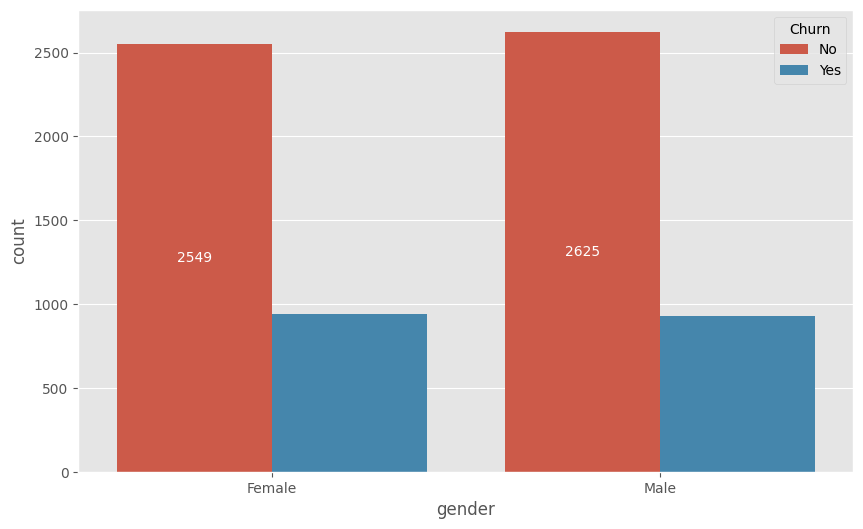

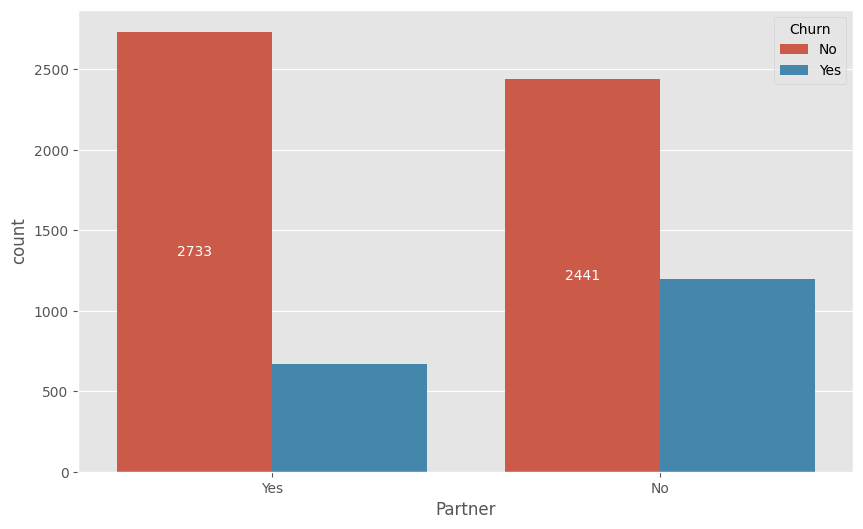

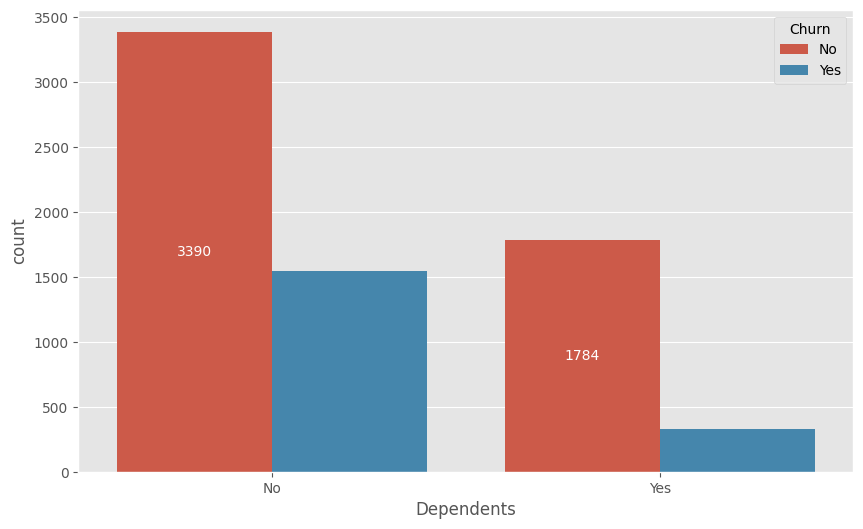

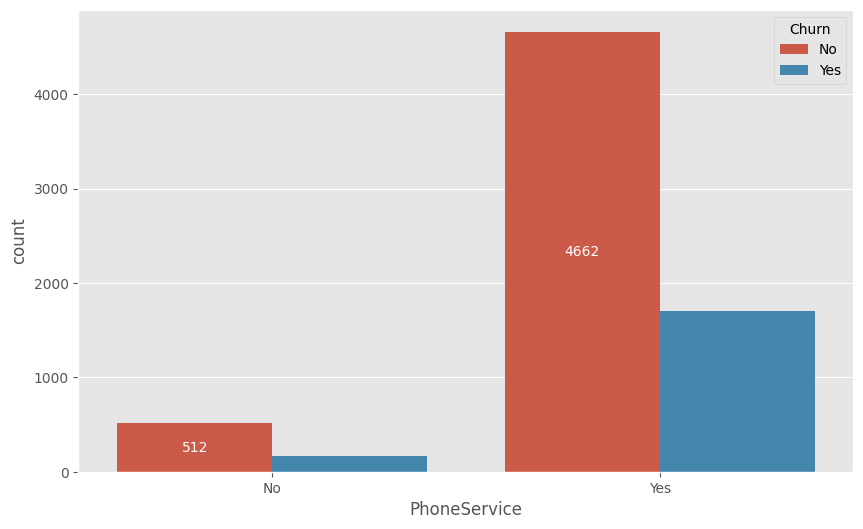

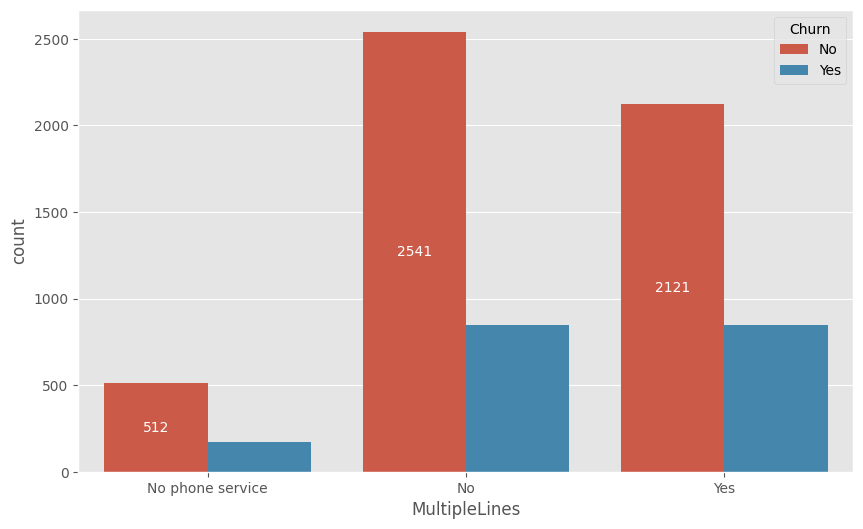

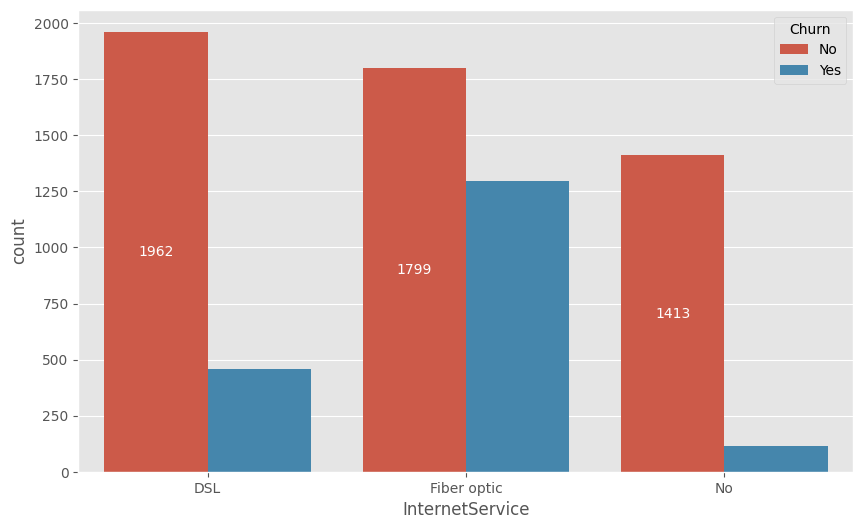

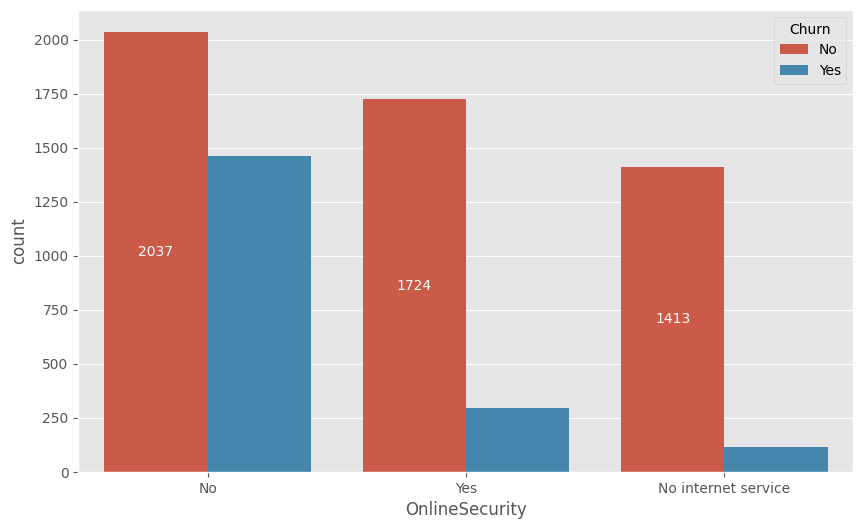

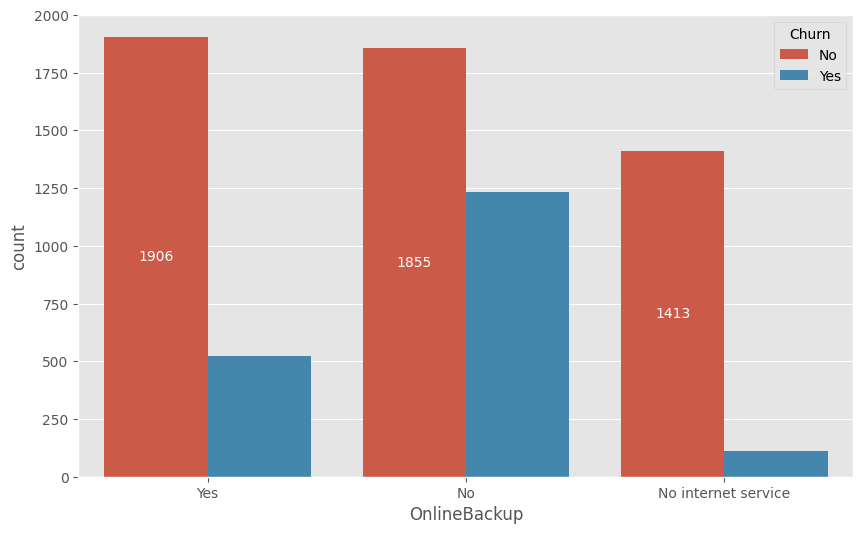

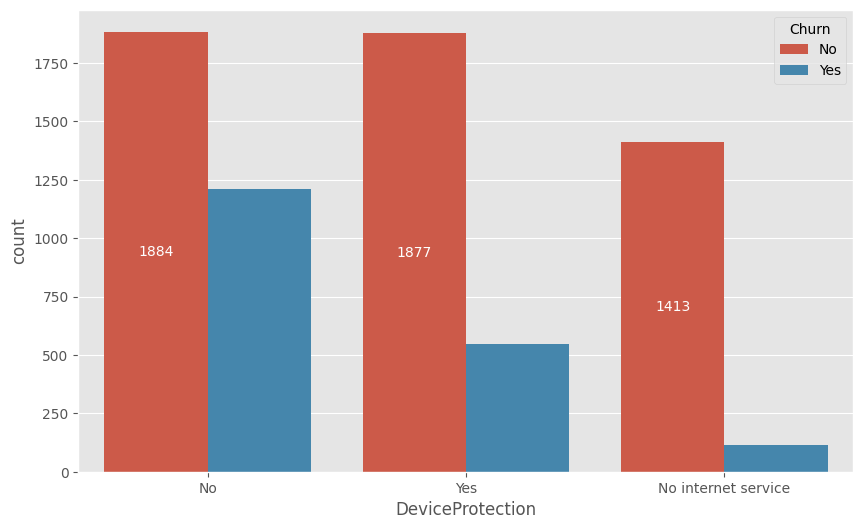

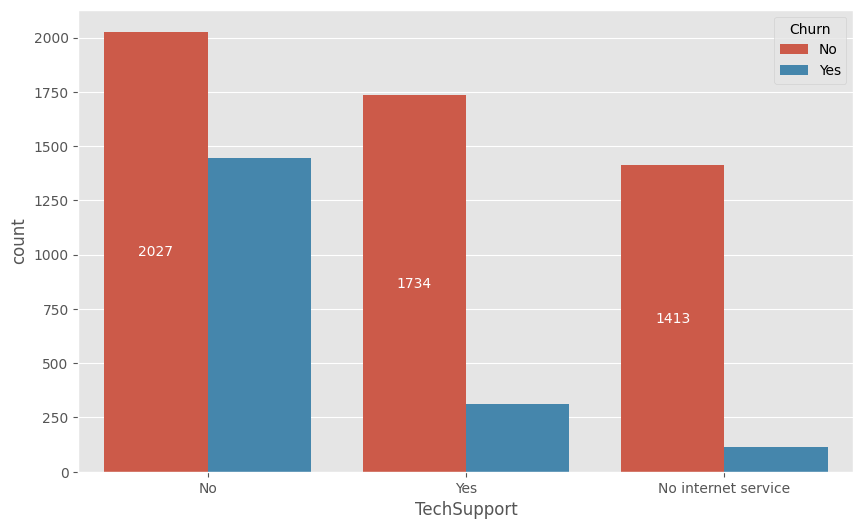

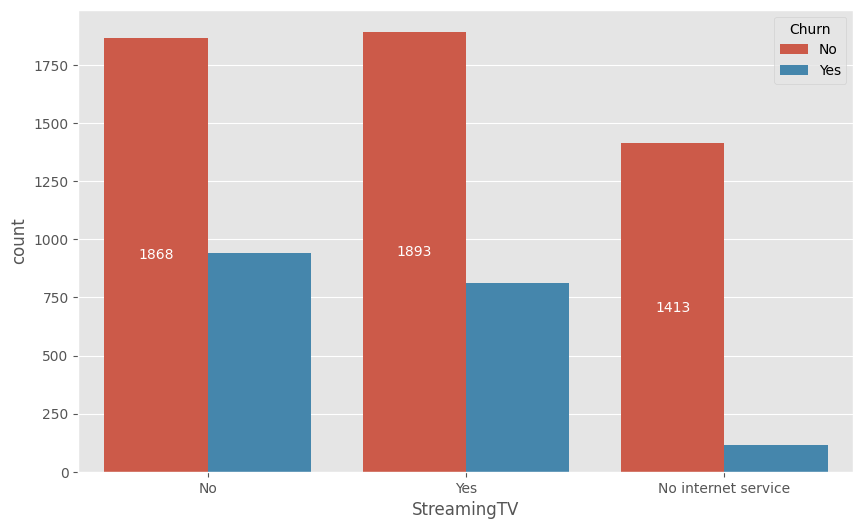

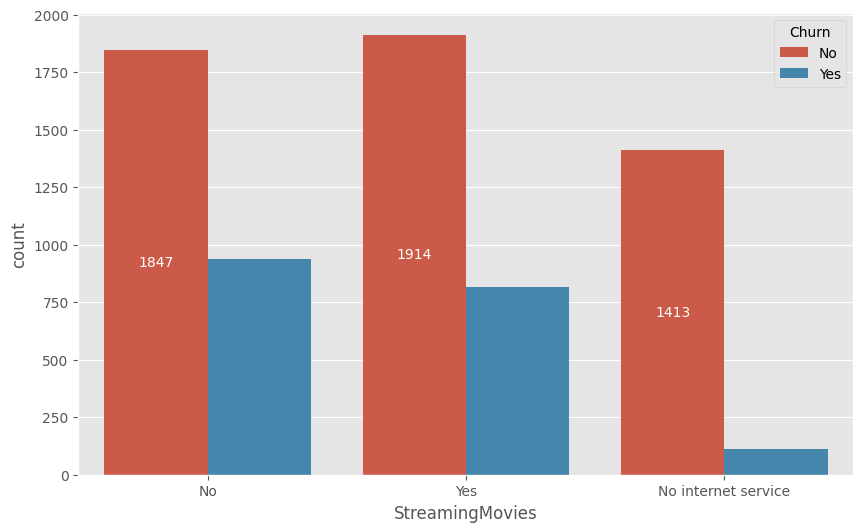

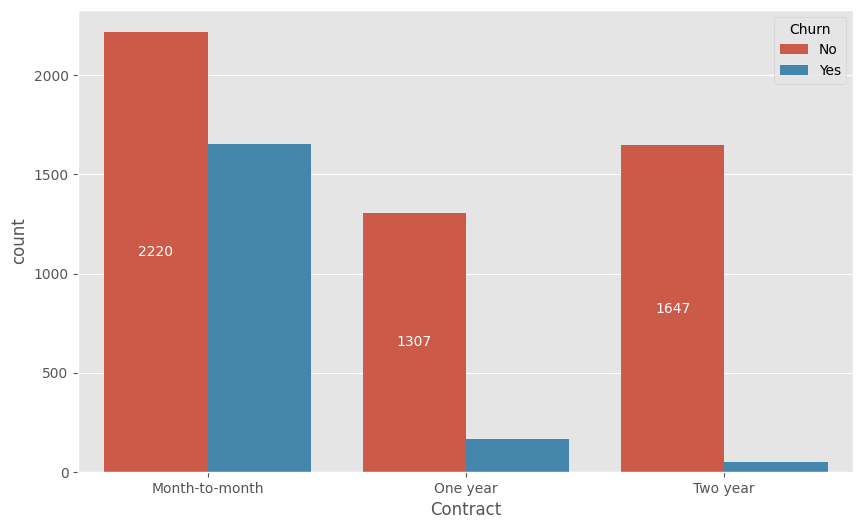

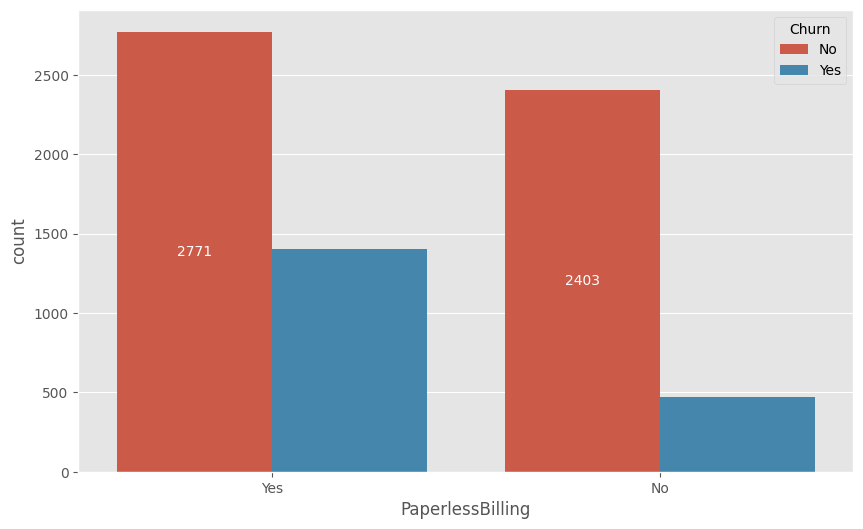

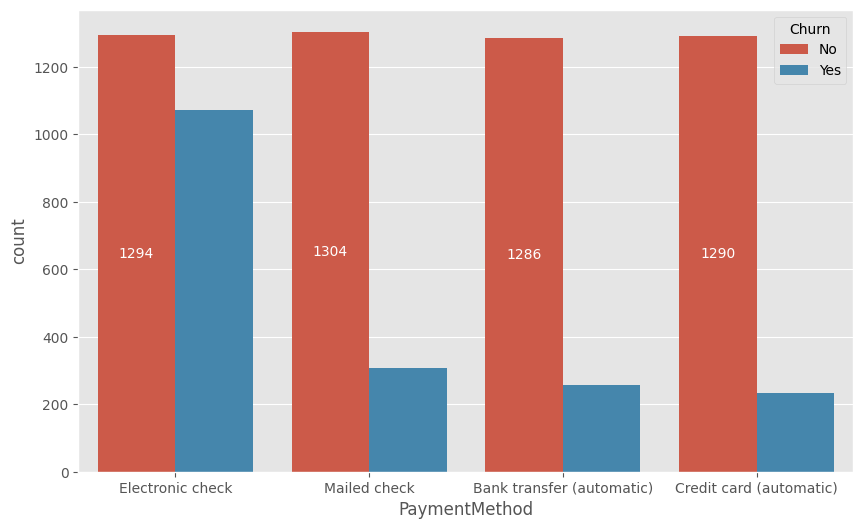

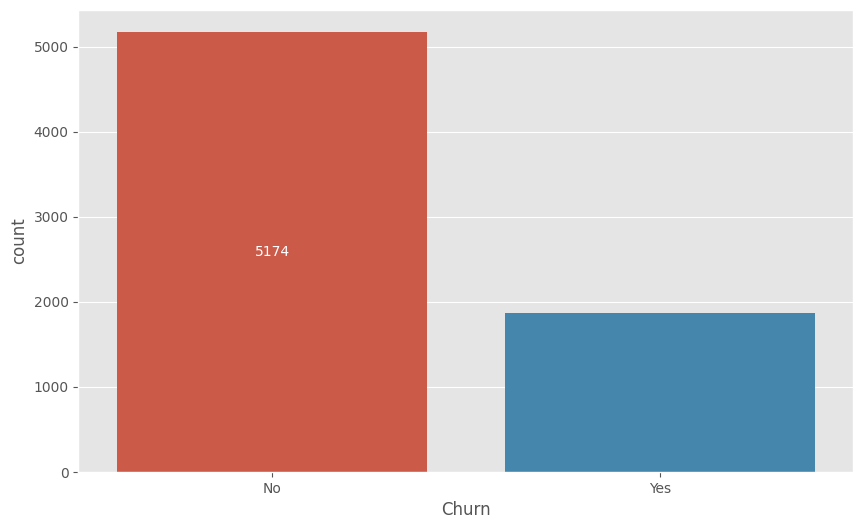

In [12]:
# lets see the churn rate according to customers attributes:
for i in cat_col.columns:
  plt.style.use("ggplot")
  plt.figure(figsize=(10,6))
  bar = sns.countplot(data=cat_col,x=i,hue="Churn")
  plt.bar_label(bar.containers[0],label_type="center",color="white")
  plt.show()

In [13]:
# numcol
num_col = df.select_dtypes([float,int])
num_col.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [14]:
# lets represent with box and histogram plot to know how the charges paid:
def hist_box_plot(data,col,bins="auto"):
  fig,axs = plt.subplots(ncols=2,figsize=(11,4))

  sns.histplot(data=data,x=col,ax=axs[0],bins=bins,kde=True,hue="Churn")
  sns.boxplot(data=data,x=col,ax=axs[1],hue="Churn")

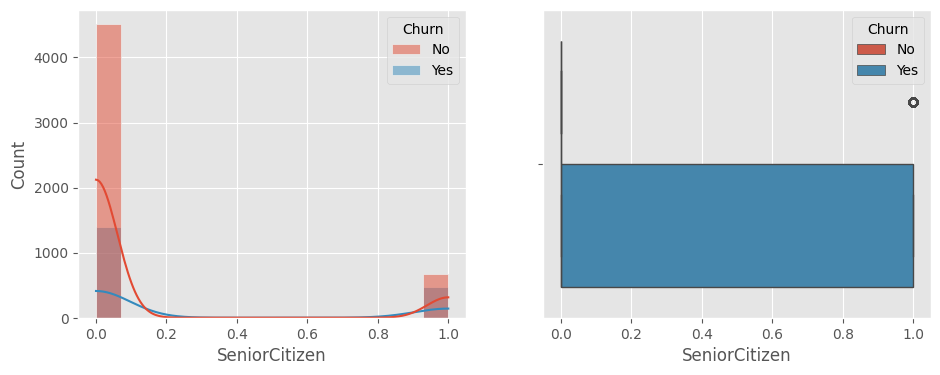

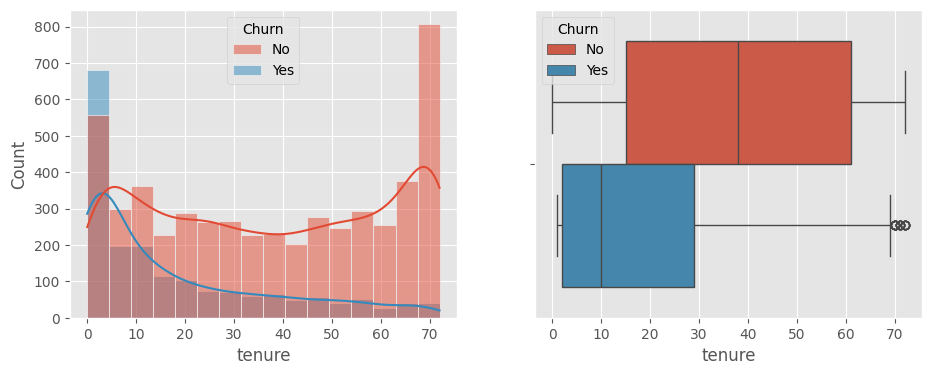

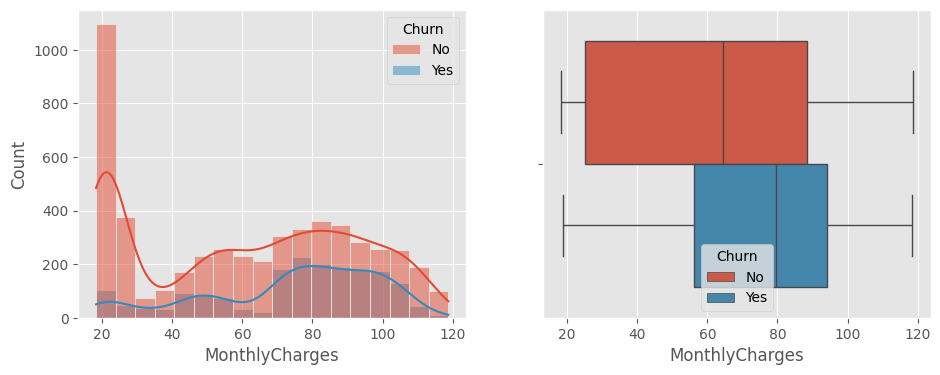

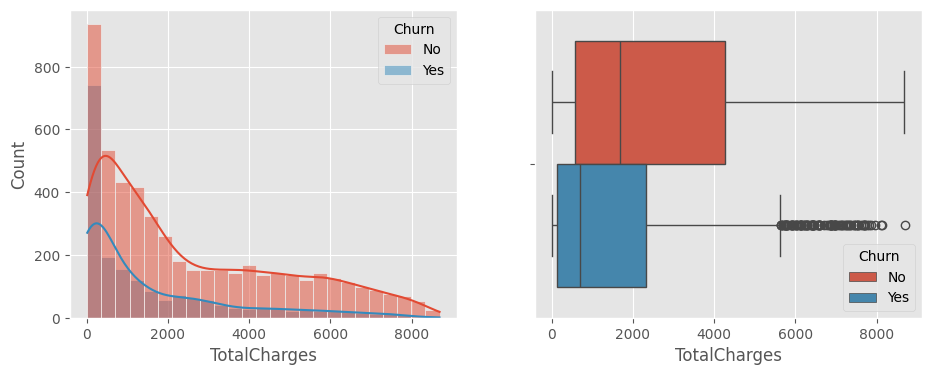

In [15]:
for col in num_col:
  hist_box_plot(df,col)

In [16]:
# lets import libraries to build churn prediction model:
from sklearn.preprocessing import LabelEncoder,StandardScaler
# with label encoder we have to convert the categroical data into numbers
# standard scaler used to standardize the data values

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [17]:
# lets do the label encoding:
encode = LabelEncoder()

In [18]:
for col in cat_col:
  df[col] = encode.fit_transform(df[col])

In [19]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [20]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

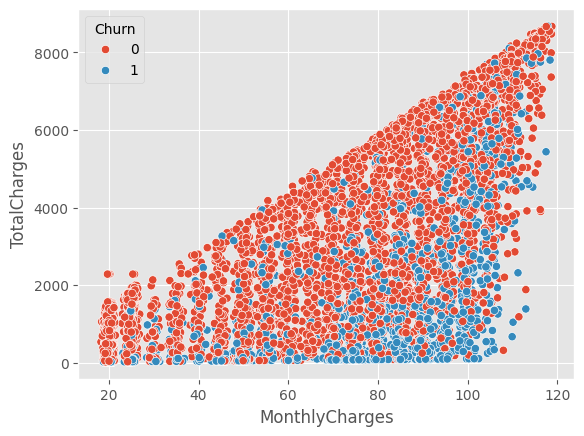

In [21]:
# lets see the churn rate wrt month and total charges paid
# 0 --> No
# 1 --> Yes
sns.scatterplot(data=df,x="MonthlyCharges",y="TotalCharges",hue="Churn")

In [23]:
# lets see new visulaization library sweetviz
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


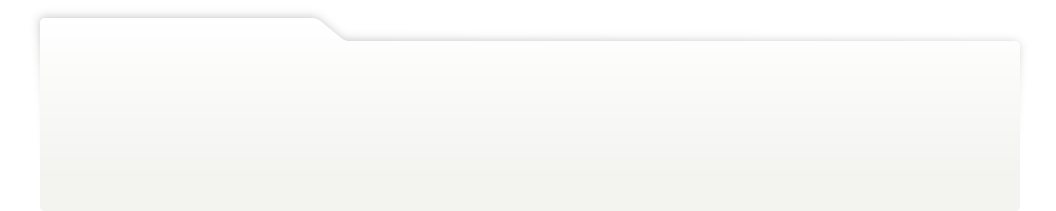
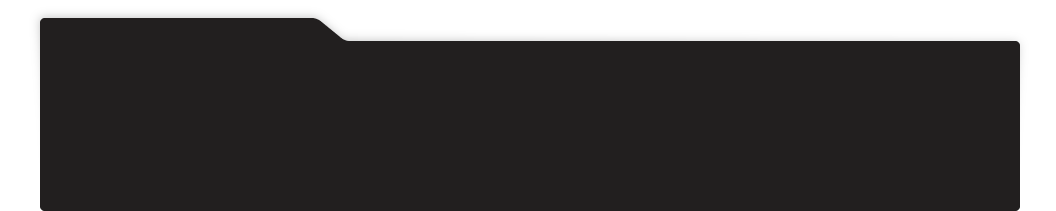
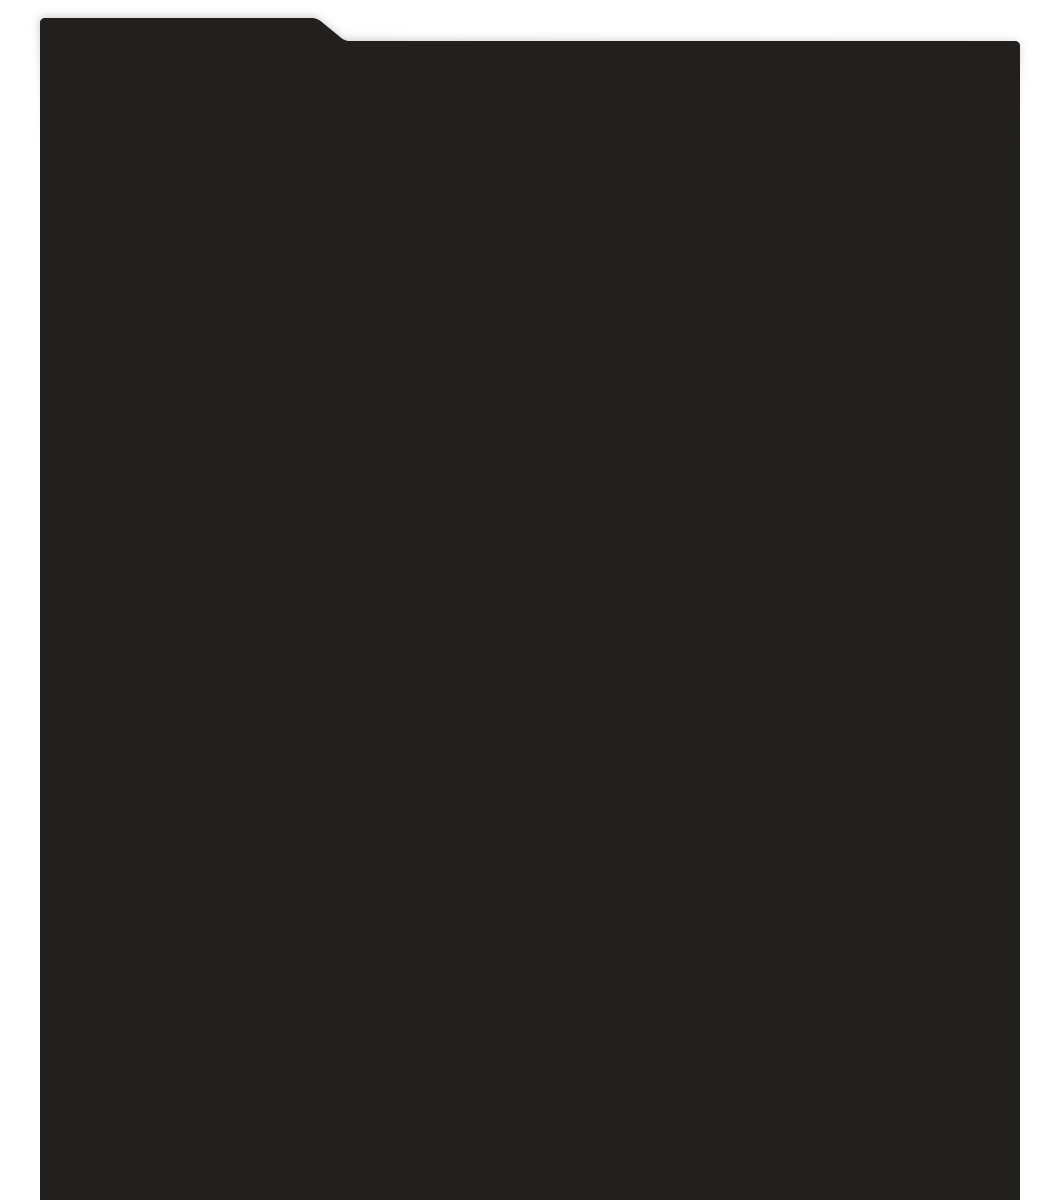
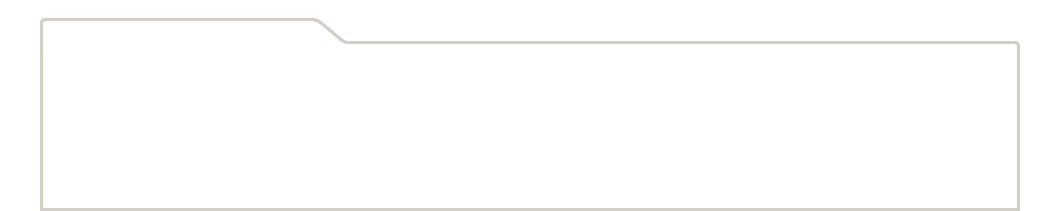
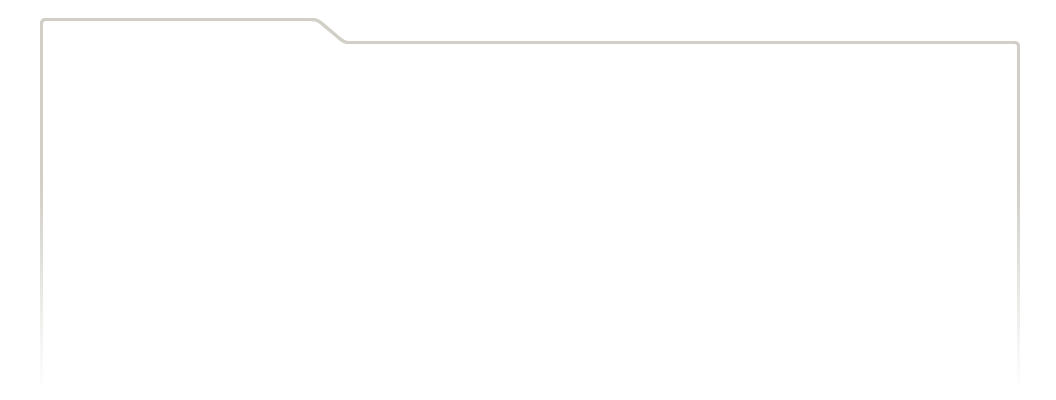
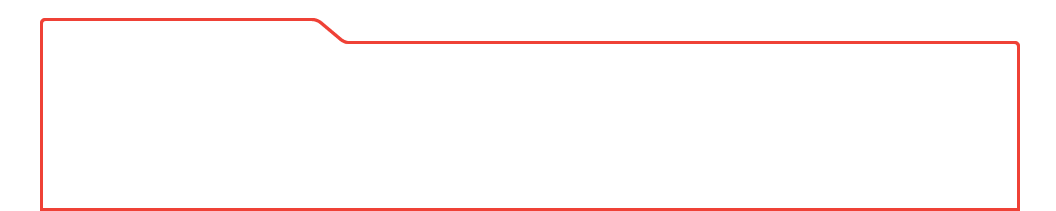
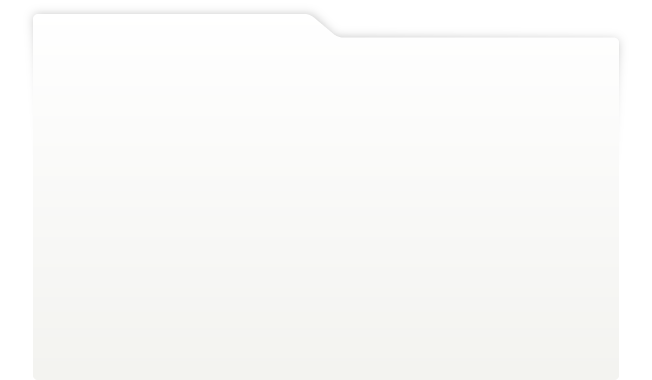
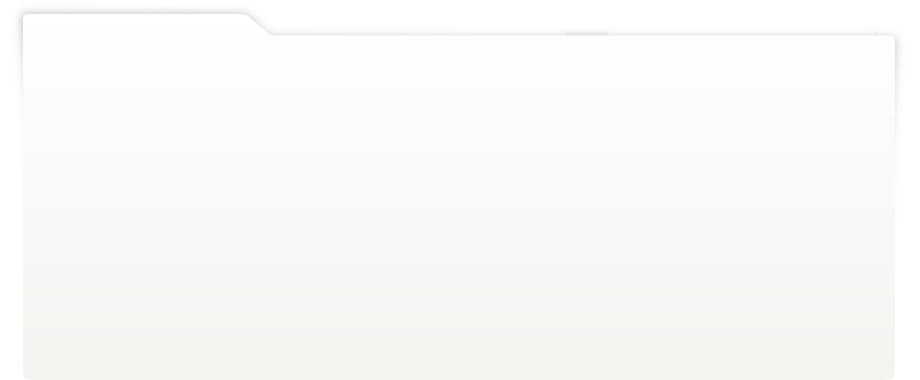
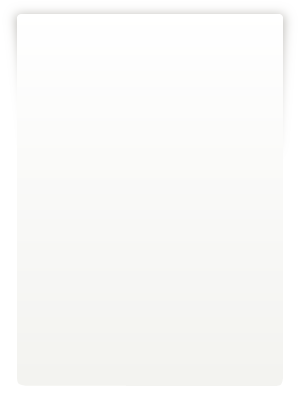
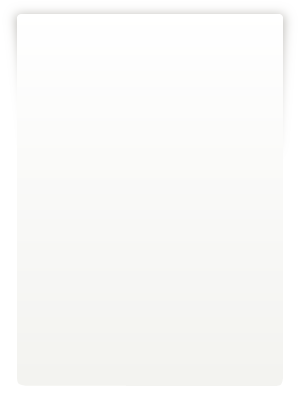
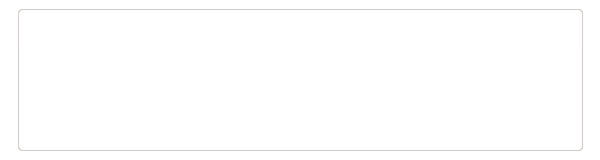
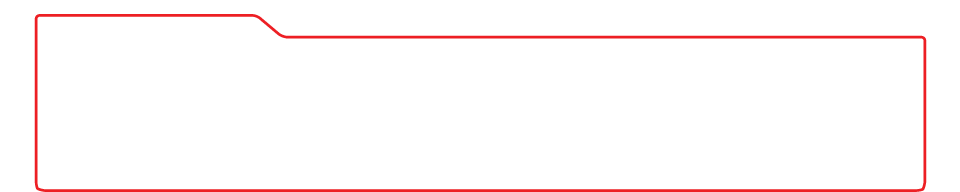
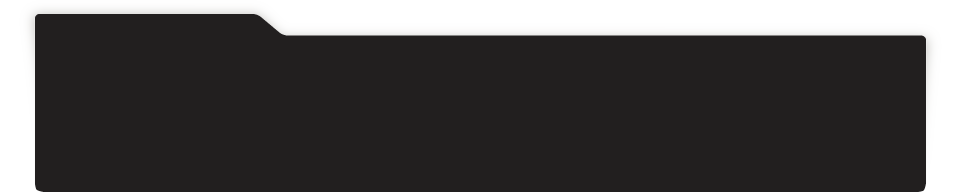
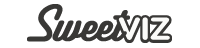
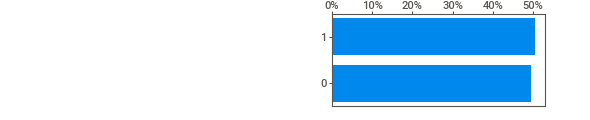
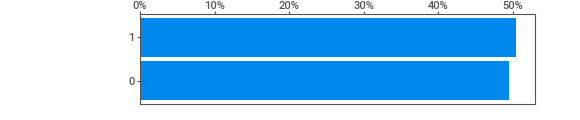
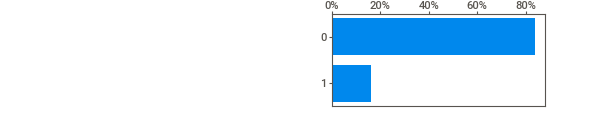
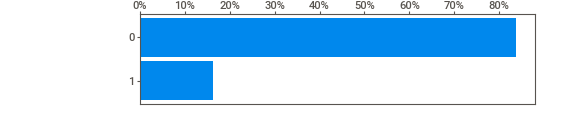
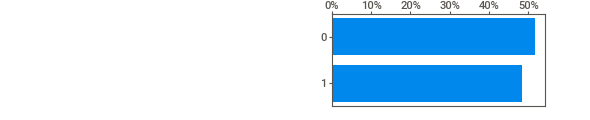
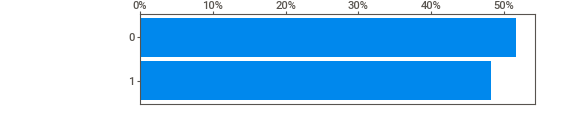
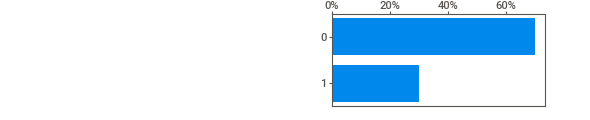
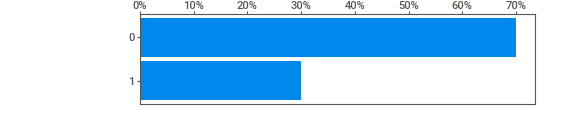
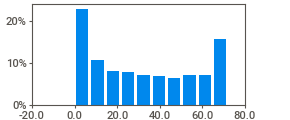
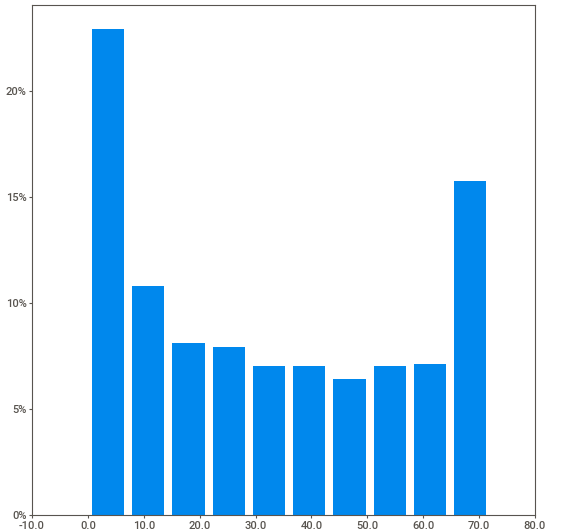
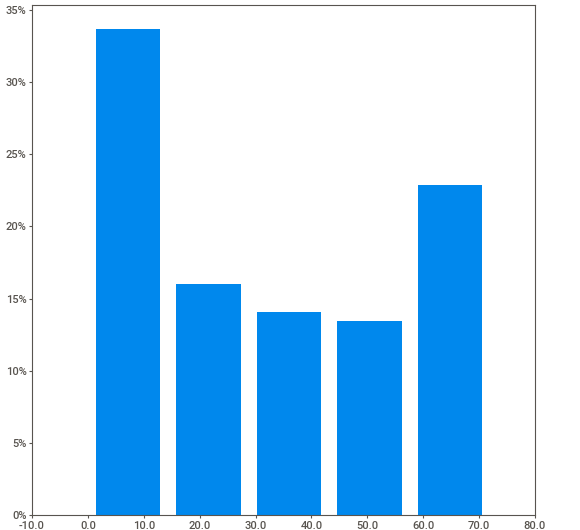
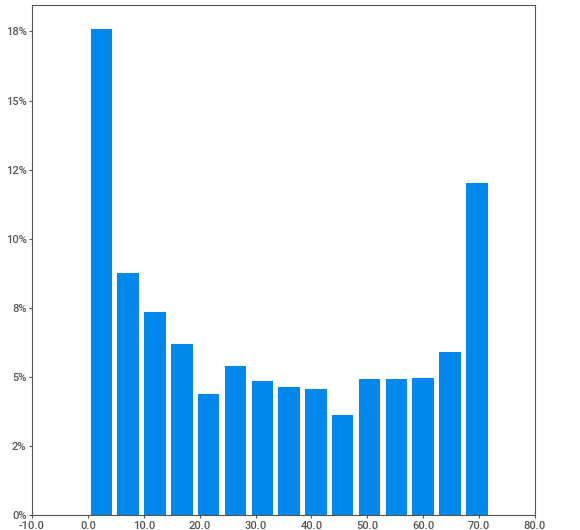
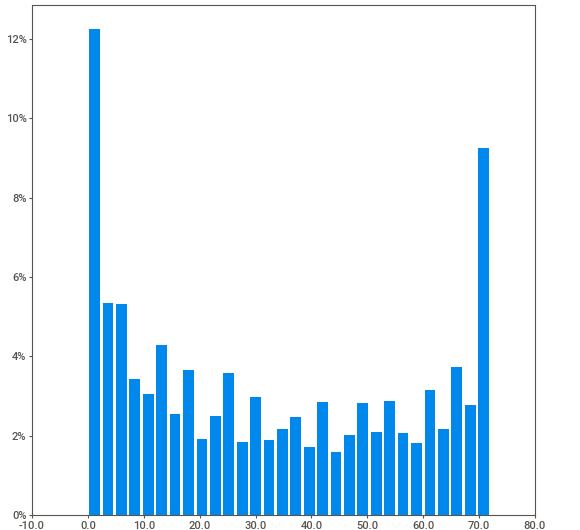
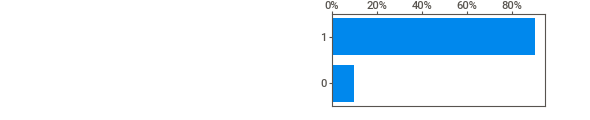
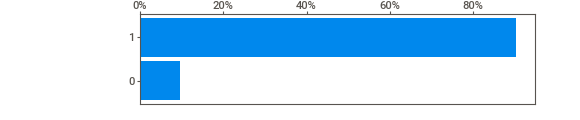
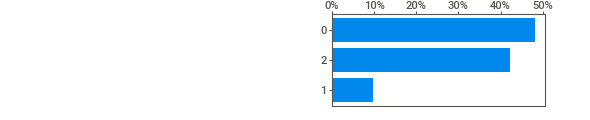
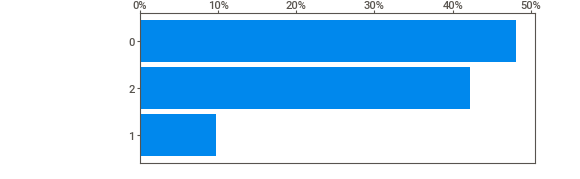
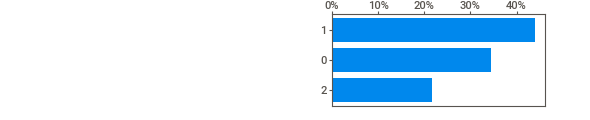
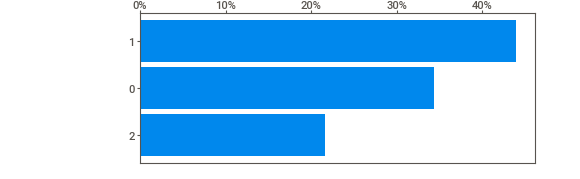
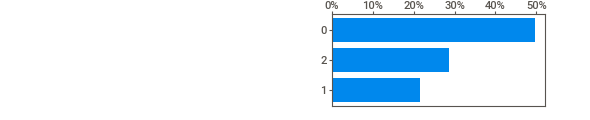
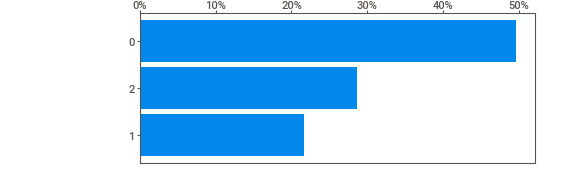
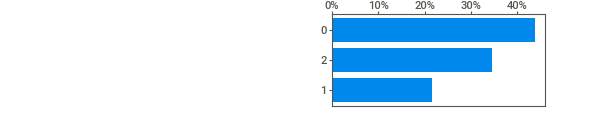
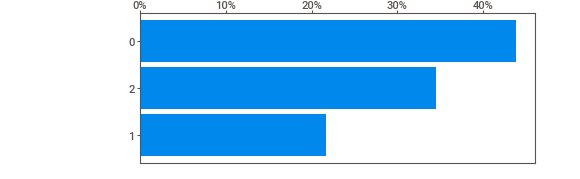
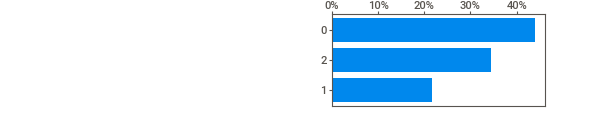
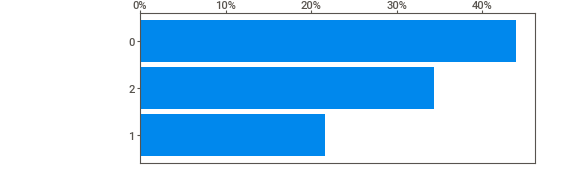
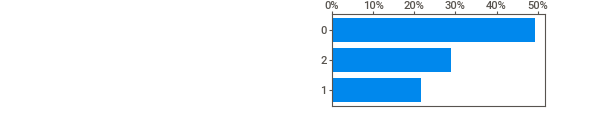
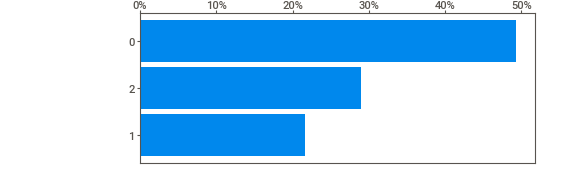
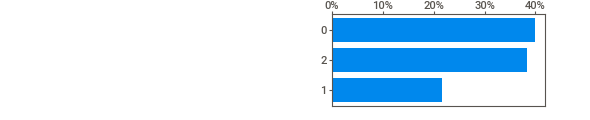
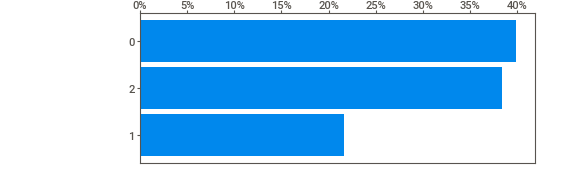
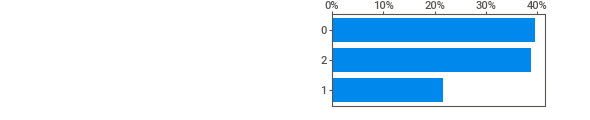
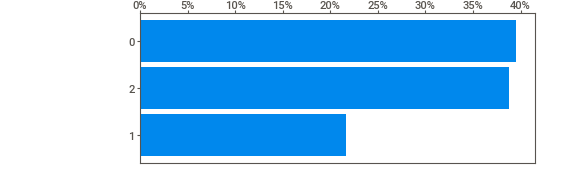
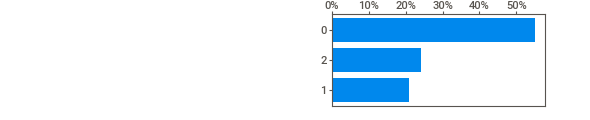
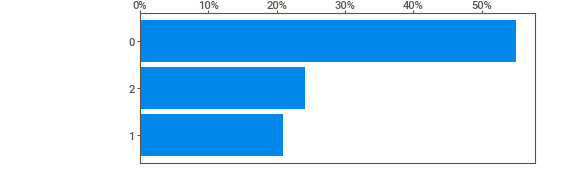
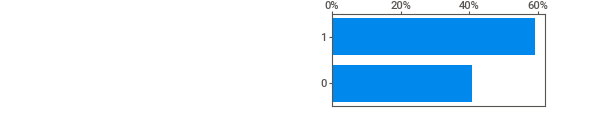
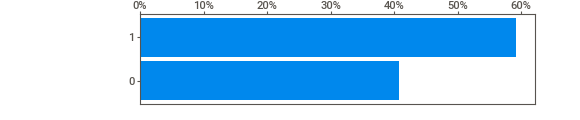
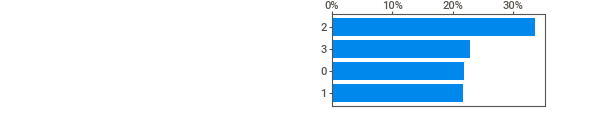
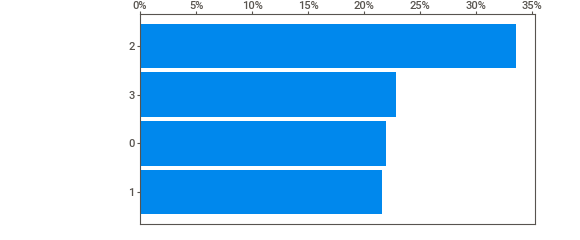
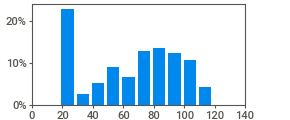
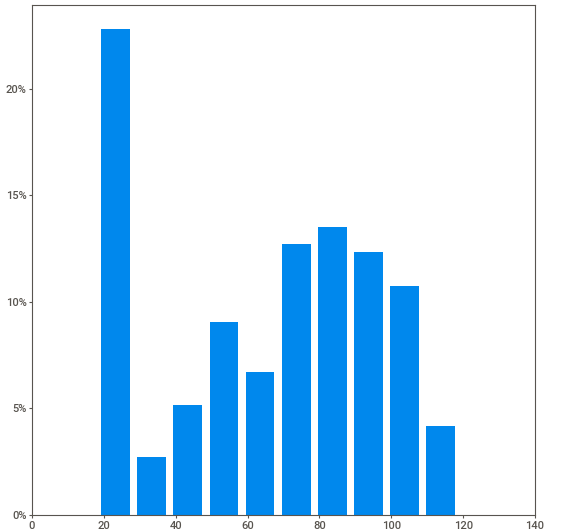
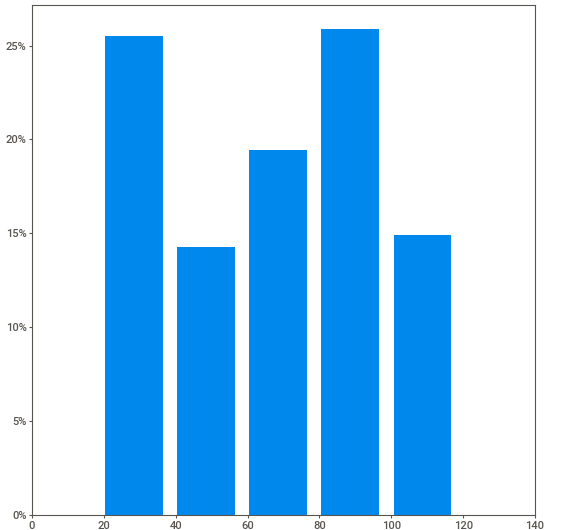
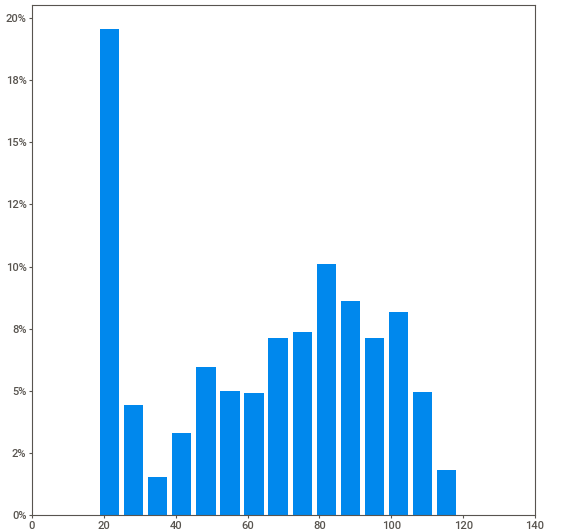
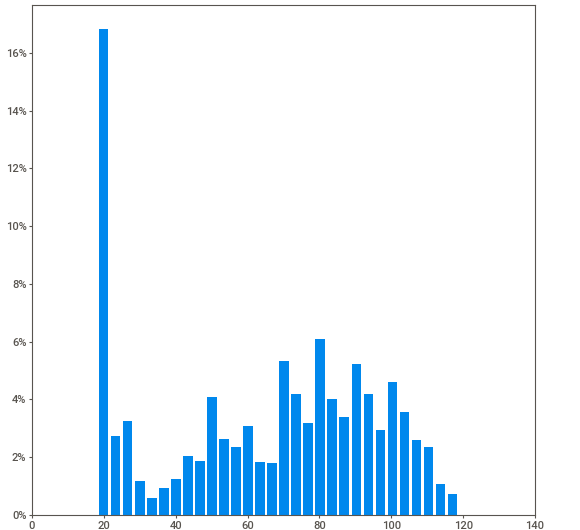
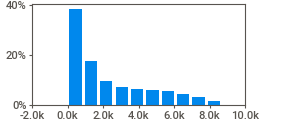
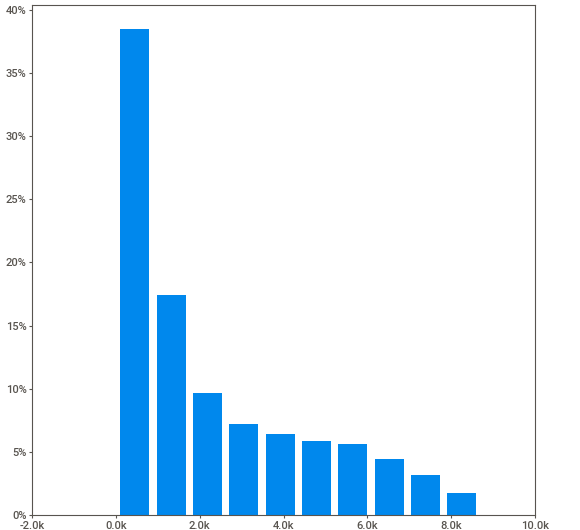
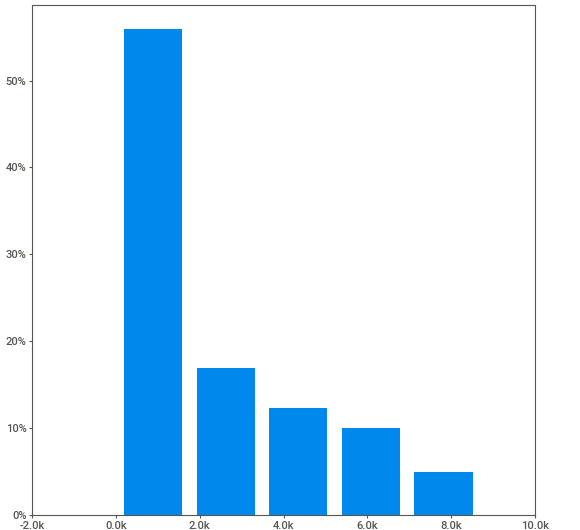
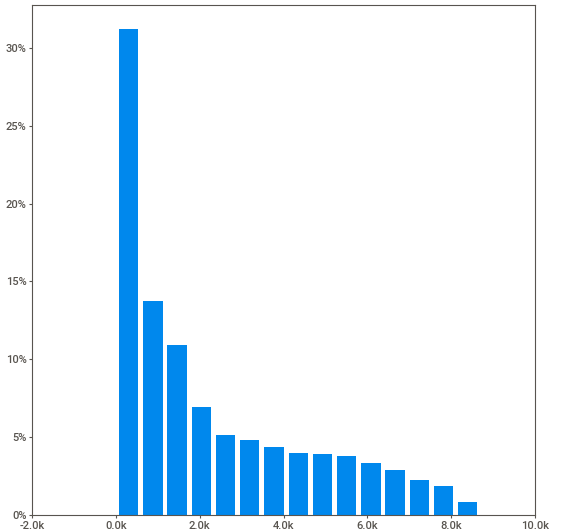
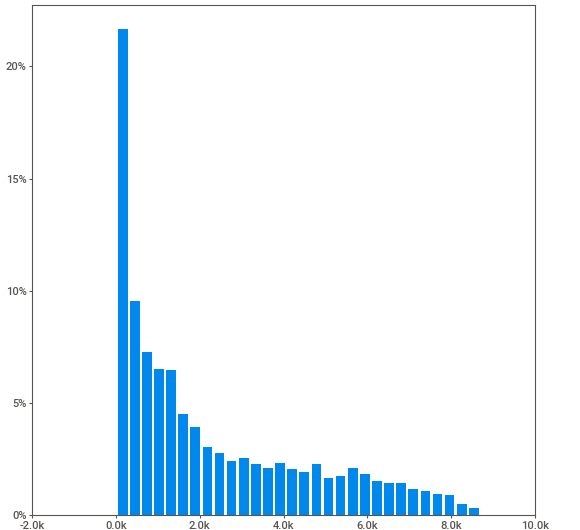
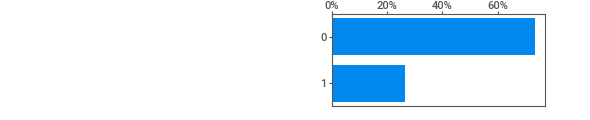
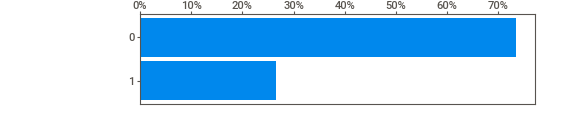
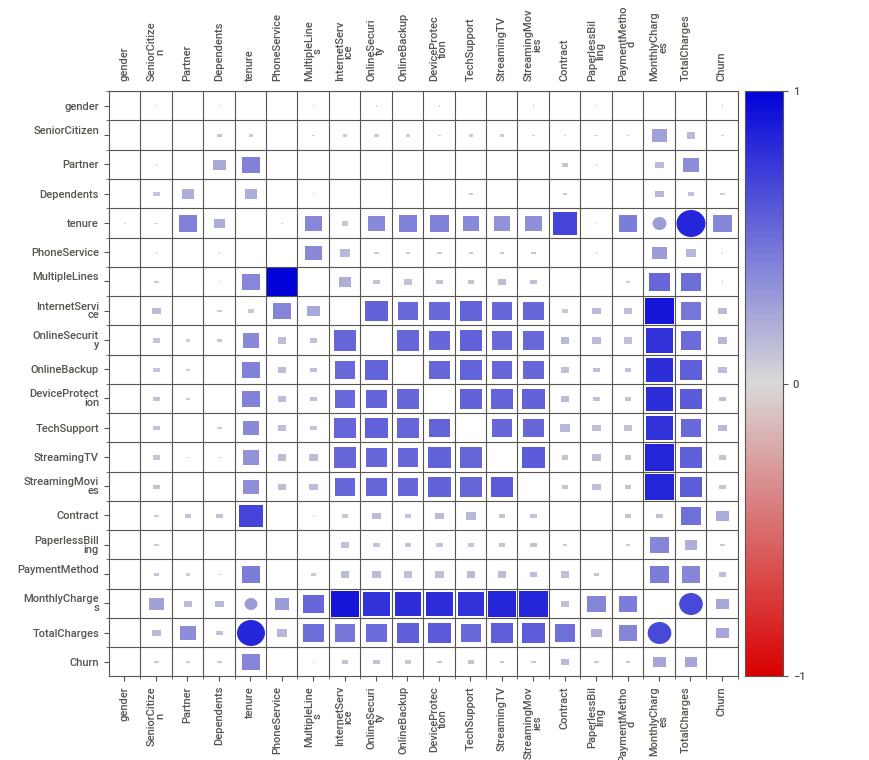
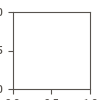

In [24]:
import sweetviz as sv
report = sv.analyze(df)
report.show_notebook()
# used to generate the rport of statistical info and plots

### ***Modeling***

In [25]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [26]:
X = df.iloc[:,:-1]
y = df['Churn']
display(X,y)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### ***Data Splitting***

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [28]:
# lets see the data is in prportion or not:
print(f"Lets chcek the stratified sampling makes data in proportion or not:\n{y_test.value_counts(normalize=True)*100}\n")
print("We are not getting the output in proportion lets use resampling technique")

Lets chcek the stratified sampling makes data in proportion or not:
0    73.456352
1    26.543648
Name: Churn, dtype: float64

We are not getting the output in proportion lets use resampling technique


In [29]:
# lets do first standar scaling:
# it makes features mean 0 nd std 1
scaler = StandardScaler()

In [30]:
x_train = scaler.fit_transform(x_train)

In [31]:
x_train

array([[ 0.99433624, -0.44177295, -0.96923413, ...,  0.40093316,
        -0.52197565, -0.26387085],
       [ 0.99433624, -0.44177295,  1.03174245, ...,  1.33627784,
         0.33747781, -0.50542331],
       [ 0.99433624, -0.44177295,  1.03174245, ...,  1.33627784,
        -0.80901319, -0.75184985],
       ...,
       [-1.00569602,  2.2636062 , -0.96923413, ...,  1.33627784,
         1.25666162,  0.15703463],
       [-1.00569602, -0.44177295,  1.03174245, ..., -0.53441153,
        -1.47766135, -0.79907574],
       [ 0.99433624, -0.44177295, -0.96923413, ...,  1.33627784,
        -1.46936546, -0.963082  ]])

In [32]:
x_test = scaler.fit_transform(x_test)

In [33]:
x_test

array([[ 0.97546068, -0.43246516,  1.04575843, ..., -0.5512027 ,
         1.67163008,  2.83037214],
       [-1.02515664,  2.31232499, -0.95624378, ..., -0.5512027 ,
         1.20655549, -0.58653914],
       [-1.02515664, -0.43246516,  1.04575843, ..., -0.5512027 ,
         0.47715792,  0.45424327],
       ...,
       [ 0.97546068, -0.43246516, -0.95624378, ..., -1.4914504 ,
        -1.45340352, -0.95491369],
       [-1.02515664, -0.43246516, -0.95624378, ..., -1.4914504 ,
        -1.4851892 , -0.52174589],
       [-1.02515664, -0.43246516,  1.04575843, ..., -1.4914504 ,
         0.21283495,  1.33766421]])

In [34]:
# used for getting the data in proportion and to improve model performance:
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler

In [35]:
# under sampling technique: used to reduce number of insatnces of Majority class
class_Majority = df[df.Churn == 0]
df_undersampled_majority = resample(class_Majority,replace=True,n_samples=len(df[df.Churn == 1]),random_state=0)
print(f"The Majority class reduced with length of Minority class 1:\n{df_undersampled_majority.Churn.value_counts()}\n")

# lets concat the Majority class in dataset:
df_undersampled = pd.concat([df[df.Churn == 1],df_undersampled_majority])
print(f"After adding the under sampled data we get the data in proportion:\n{df_undersampled.Churn.value_counts()}")

The Majority class reduced with length of Minority class 1:
0    1869
Name: Churn, dtype: int64

After adding the under sampled data we get the data in proportion:
1    1869
0    1869
Name: Churn, dtype: int64


In [36]:
A = df_undersampled.iloc[:,:-1]
b = df_undersampled['Churn']
display(A,b)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,1,0,0,20,1,0,1,0,0,0,0,0,2,0,1,2,81.45,1671.60
4888,1,0,0,0,44,1,0,1,2,2,2,0,2,2,1,1,2,106.05,4510.80
778,0,0,1,0,59,1,2,1,2,2,2,2,0,2,1,1,1,107.00,6152.30
3075,1,0,1,0,71,1,2,1,0,2,2,0,2,2,1,1,0,105.70,7472.15


2       1
4       1
5       1
8       1
13      1
       ..
482     0
4888    0
778     0
3075    0
5331    0
Name: Churn, Length: 3738, dtype: int64

In [37]:
x1_train,x1_test,y1_train,y1_test = train_test_split(A,b,test_size=0.2,random_state=42)

In [38]:
print(f"Checking the percentage of training data is n proportion:\n{y1_train.value_counts(normalize=True)*100}\n\n")
print(f"Checking the percentage testing data is n proportion:\n{y1_test.value_counts(normalize=True)*100}\n\n")
print("Here data is in proportion")

Checking the percentage of training data is n proportion:
0    50.167224
1    49.832776
Name: Churn, dtype: float64


Checking the percentage testing data is n proportion:
1    50.668449
0    49.331551
Name: Churn, dtype: float64


Here data is in proportion


In [39]:
x1_train = scaler.fit_transform(x1_train)

In [40]:
x1_train

array([[ 0.99134183,  2.00209271, -0.90912701, ...,  0.37974204,
        -0.87298864, -0.9208675 ],
       [-1.00873379, -0.49947737,  1.09995633, ..., -1.58807198,
        -0.65359586, -0.49840742],
       [ 0.99134183, -0.49947737,  1.09995633, ..., -0.60416497,
         0.58614746,  0.04767598],
       ...,
       [ 0.99134183, -0.49947737, -0.90912701, ...,  0.37974204,
         1.22169003,  0.46795393],
       [ 0.99134183,  2.00209271, -0.90912701, ..., -0.60416497,
        -0.34714245, -0.49748863],
       [ 0.99134183, -0.49947737, -0.90912701, ..., -0.60416497,
        -1.69135852, -0.73067778]])

In [41]:
x1_test = scaler.fit_transform(x1_test)

In [42]:
x1_test

array([[ 1.0298573 , -0.44362146, -0.8837151 , ..., -0.58591079,
        -0.67258249, -0.11073998],
       [ 1.0298573 , -0.44362146,  1.13158641, ..., -0.58591079,
         0.78649713,  1.80325947],
       [ 1.0298573 , -0.44362146, -0.8837151 , ...,  1.34051238,
        -1.68150189, -0.96370354],
       ...,
       [-0.97100831, -0.44362146, -0.8837151 , ...,  1.34051238,
        -0.6200346 , -0.94981372],
       [ 1.0298573 , -0.44362146,  1.13158641, ..., -1.54912237,
        -1.52035504, -0.16173809],
       [ 1.0298573 , -0.44362146,  1.13158641, ...,  0.37730079,
         1.23140255, -0.05029861]])

In [43]:
# train the data:
clf.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [44]:
y_pred = clf.predict(x1_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,

In [45]:
# actual output:
y1_test.values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,

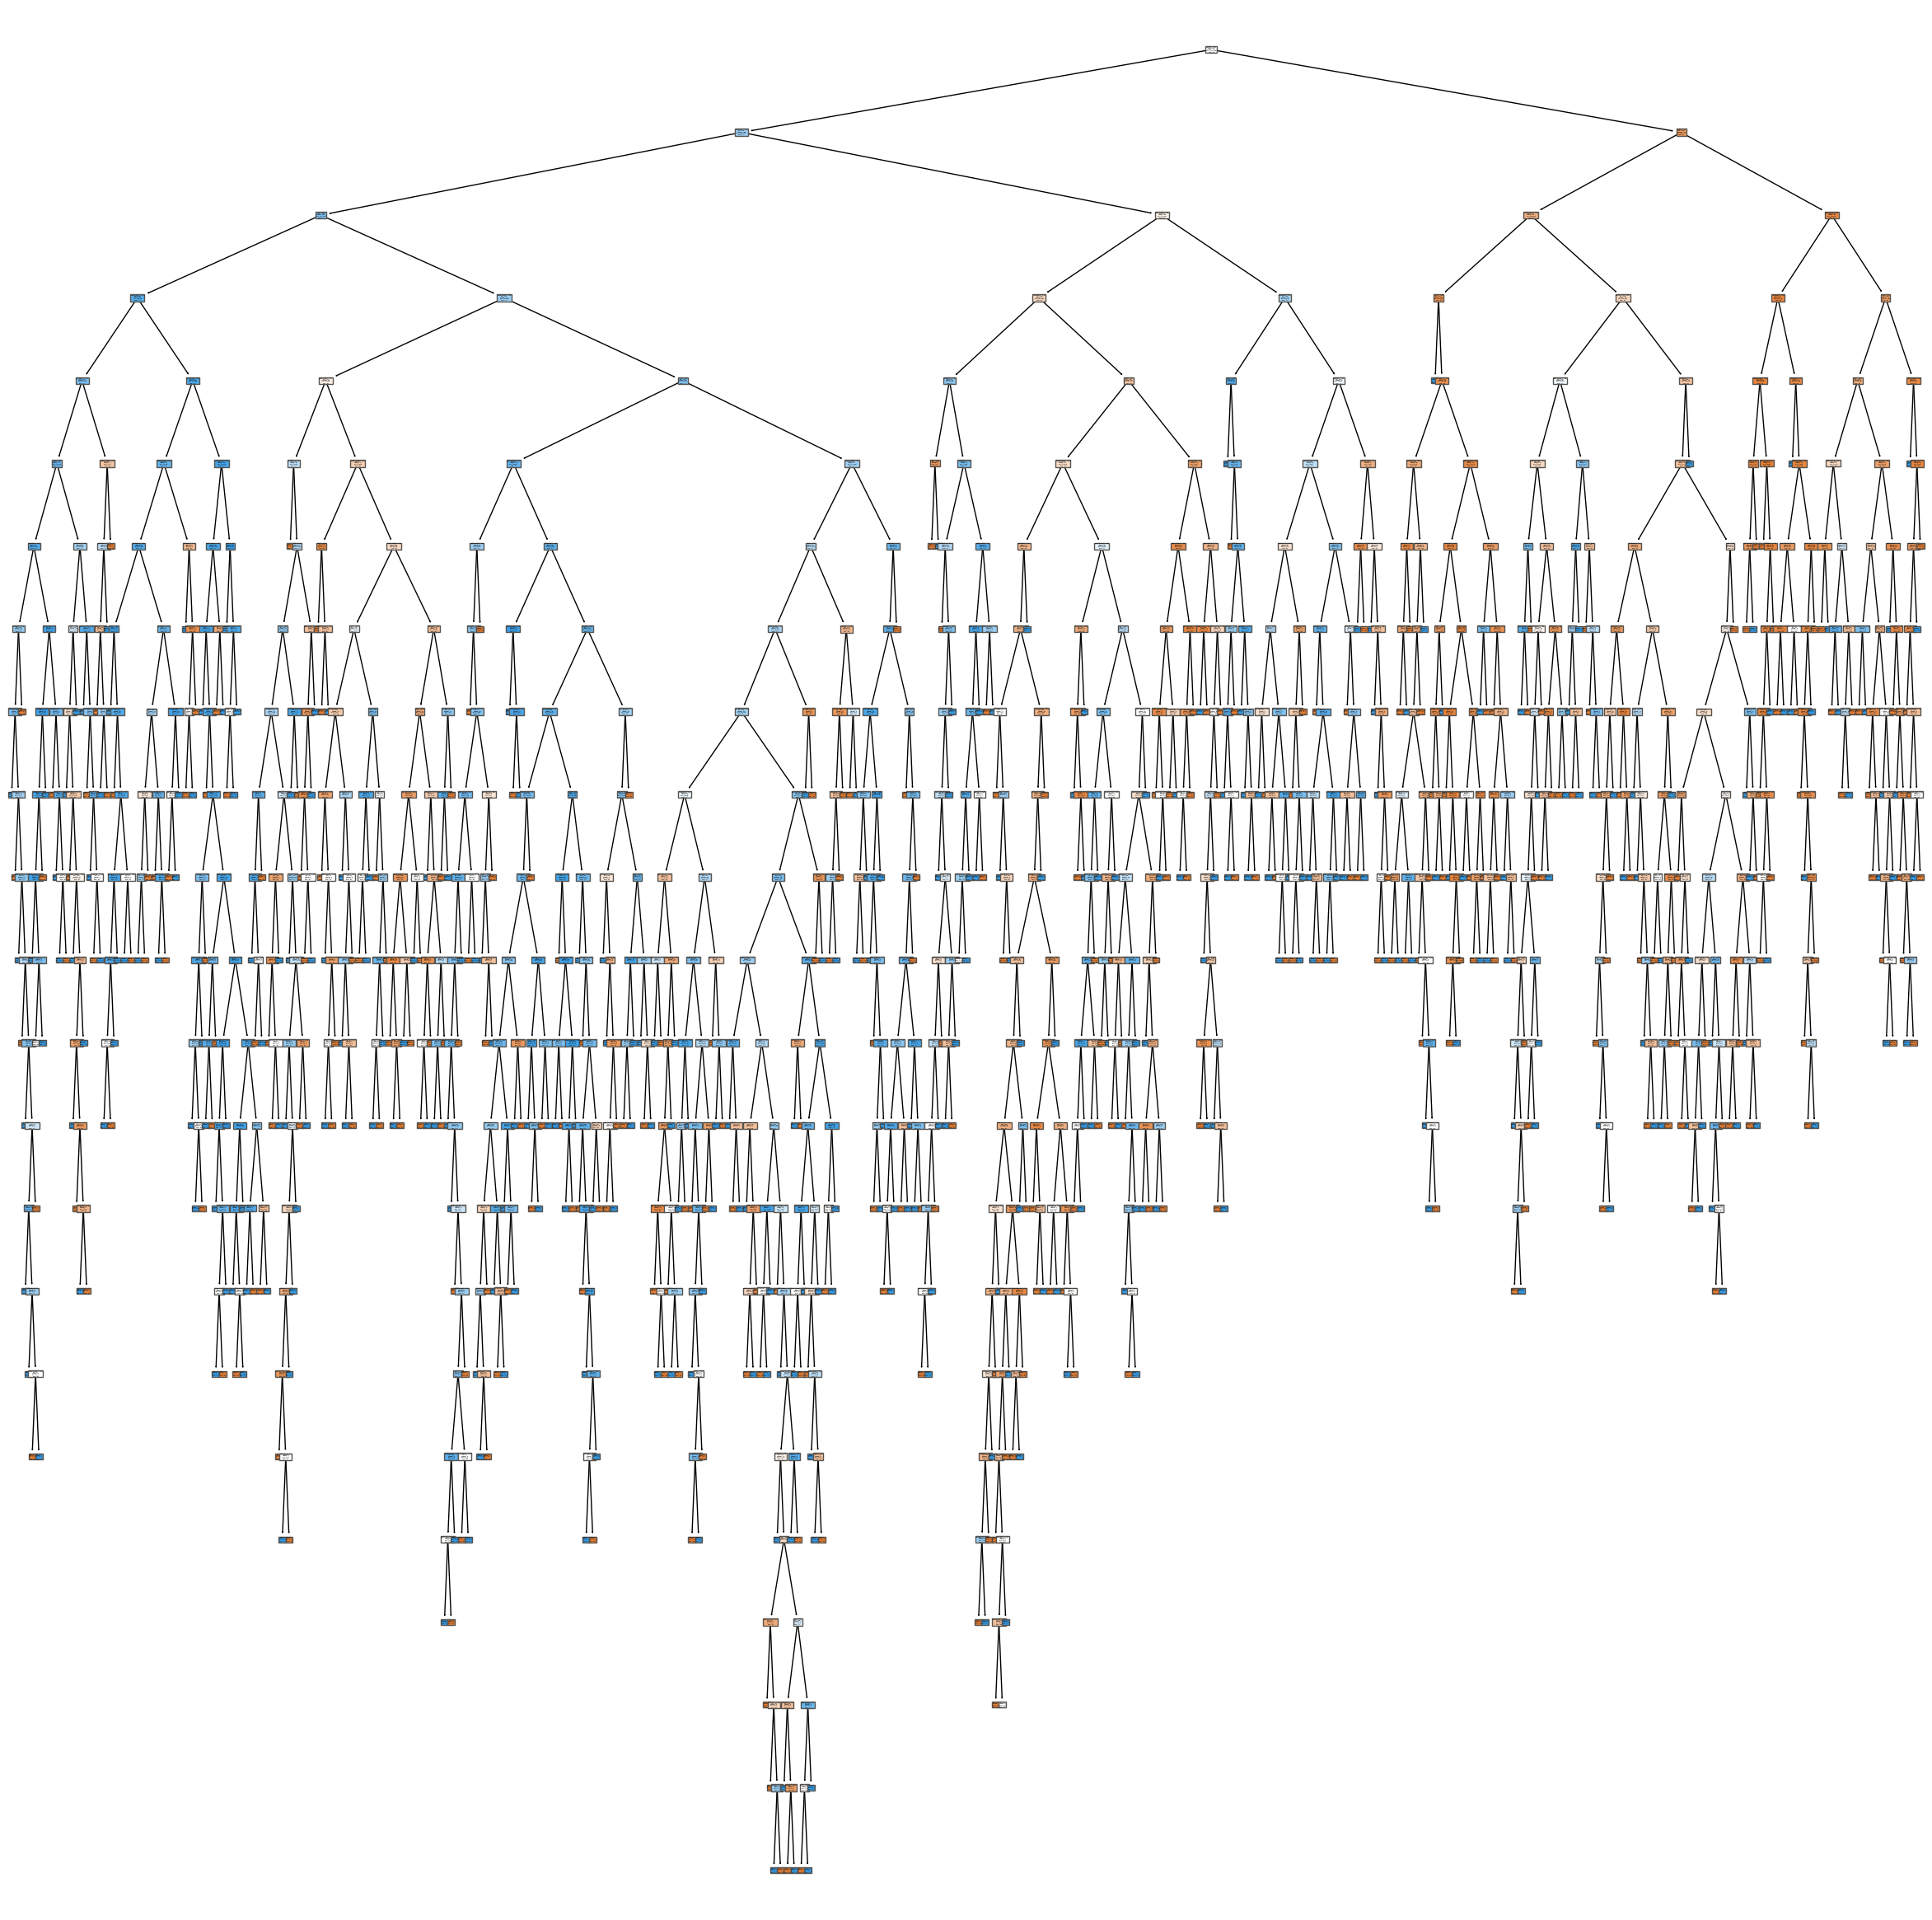

In [47]:
# plot the tree:
plt.figure(figsize=(30,30))
tree.plot_tree(clf,feature_names=A.columns,class_names=['No','Yes'],filled=True);

In [53]:
# Model accuracy:
accuracy_score(y1_test,y_pred)*100

70.32085561497327

In [55]:
# lets see we can get the better performance with logitsic reg:
model = LogisticRegression()

In [56]:
# training:
model.fit(x1_train,y1_train)

LogisticRegression()

In [57]:
# test:
y1_pred = model.predict(x1_test)
y1_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [58]:
y1_test.values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,

In [59]:
# checking log reg models accuracy:
accuracy_score(y1_test,y1_pred)*100

77.94117647058823

In [62]:
# performance measurement:
con_mat = confusion_matrix(y1_test,y1_pred)
con_mat

array([[274,  95],
       [ 70, 309]])

Actual we have 369 customer who not leave and 379 customers those are leave

Out of 369 --> model predicts 274 with No churn --> True Negative

Rest of 95 who actually not churn but model predicts that customer churns --> False Positive

Out of 379 --> model predicts 309 customers churns --> True positive

Rest of 70 customer who actually Churns but model predicting that they Not Churns --> False Negative



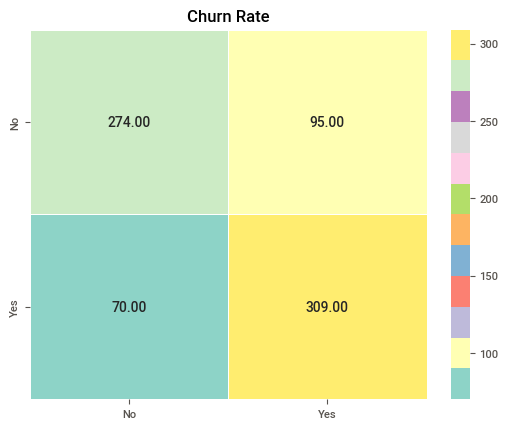

In [66]:
# we can implement con_mat in heatmap
sns.heatmap(data=con_mat,annot=True,fmt=".2f",linewidth=0.6,linecolor="white",cmap="Set3",xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.title("Churn Rate")
print(f"Actual we have 369 customer who not leave and 379 customers those are leave\n")
print(f"Out of 369 --> model predicts 274 with No churn --> True Negative\n")
print(f"Rest of 95 who actually not churn but model predicts that customer churns --> False Positive\n")
print(f"Out of 379 --> model predicts 309 customers churns --> True positive\n")
print(f"Rest of 70 customer who actually Churns but model predicting that they Not Churns --> False Negative\n")

In [63]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       369
           1       0.76      0.82      0.79       379

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



In [68]:
# recall score: used to chcek the accuracy of negative predictions
recall_score(y1_test,y1_pred)*100

81.53034300791556

In [70]:
# precisio: used to chcek the accuracy of positive predictions
precision_score(y1_test,y1_pred)*100

76.48514851485149

In [71]:
f1_score(y1_test,y1_pred)

0.789272030651341

In [72]:
logreg = pd.DataFrame({"Actual":y1_test,"Predicted":y1_pred})

<Axes: >

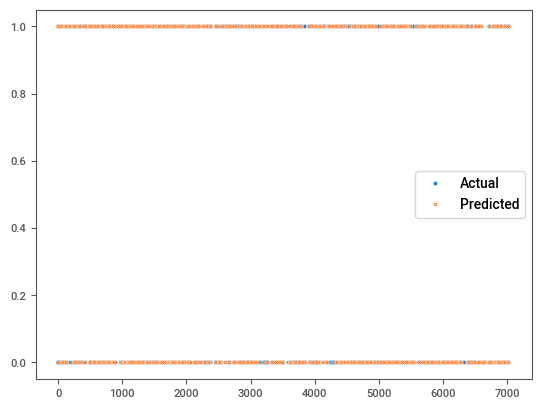

In [75]:
# lets represent the log reg plot :
sns.scatterplot(data=logreg)

In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
